In [144]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

# Loading Test Data

In [145]:
hr_att_test= pd.read_csv("/content/drive/MyDrive/AbiML/Colab Notebooks1/colab datas/test_HRattretion_HAkathon.csv")
hr_att_test.count()

Emp_ID    741
dtype: int64

# Loading Train data

In [146]:
hr_att_train= pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks1/colab datas/train_HRattretion_hakathon.csv')
hr_att_train

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


# Changing to Date type

In [147]:
hr_att_train['LastWorkingDate']= pd.to_datetime(hr_att_train['LastWorkingDate'])
hr_att_train['Dateofjoining']= pd.to_datetime(hr_att_train['Dateofjoining'])
hr_att_train['MMM-YY']= pd.to_datetime(hr_att_train['MMM-YY'])


In [148]:
hr_att_train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [149]:
#hr_att_train1=hr_att_train.groupby(['Emp_ID','MMM-YY']).sum('Total Business Value').sort_values(['Emp_ID'],ascending=True)
#hr_att_train1

# Extracting resigned employee rows using Last working date

In [150]:
hr_att_train_resigned_employes = hr_att_train[~hr_att_train['LastWorkingDate'].isnull()]
hr_att_train_resigned_employes['Attrition']=1
hr_att_train_resigned_employes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1
20,2017-11-01,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1,1
27,2016-12-01,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2017-02-01,2779,28,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1,1
19054,2016-08-01,2782,26,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1,1
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,1
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,1


# Approach 1 to create dependent field- Attrition

In [151]:
#df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')
hr_train_merged=pd.merge(hr_att_train,hr_att_train_resigned_employes[['Emp_ID','Attrition']], on='Emp_ID',how='left')

In [152]:
hr_train_merged['Attrition'].fillna(0,inplace=True)
hr_train_merged

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,1.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,1.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,740280,3,0.0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,448370,3,0.0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,0,2,0.0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,200420,2,0.0


In [153]:
hr_train_merged['Attrition'].value_counts()

1.0    10359
0.0     8745
Name: Attrition, dtype: int64

# `Approach 2 for creating dependent field Attrition`

In [154]:
hr_att_train_app_2=hr_att_train.copy()

In [155]:
hr_att_train_app_2['Attretion'] = np.where(pd.isnull(hr_att_train['LastWorkingDate'])==True, 0, 1)
hr_att_train_app_2

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attretion
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,740280,3,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,448370,3,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,0,2,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,200420,2,0


In [156]:
hr_att_train_app_2['Attrition1']=hr_att_train_app_2.groupby('Emp_ID')['Attretion'].transform('max')
hr_att_train_app_2

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attretion,Attrition1
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0,1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,740280,3,0,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,448370,3,0,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,0,2,0,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaT,2,2,200420,2,0,0


In [157]:
hr_att_train_app_2['Attrition1'].value_counts()

1    10359
0     8745
Name: Attrition1, dtype: int64

In [158]:
hr_att_train_app_2.drop(columns=['Attretion'], axis=1, inplace=True)

# Creating new field as Experience years by subracting date of joining with mmm-yy 

In [159]:

#df['month'] = ((df. date2 - df. date1) / np. timedelta64(1, 'M'))
hr_att_train_app_2['experience_months'] = ((hr_att_train_app_2['MMM-YY'] - hr_att_train_app_2['Dateofjoining'])/ np. timedelta64(1, 'M'))

In [160]:
def get_exp(exp_mth):
    mth = str('%01d' %(exp_mth))[:1]
    return mth

hr_att_train_app_2['experience_months_trim'] = hr_att_train_app_2.experience_months.apply(get_exp)
print(hr_att_train_app_2[['experience_months','experience_months_trim']].head(10))

   experience_months experience_months_trim
0           0.262839                      0
1           1.281340                      1
2           2.234132                      2
3          -0.164274                      0
4           0.821372                      0
5          -0.197129                      0
6           0.821372                      0
7           1.839874                      1
8           2.759810                      2
9           3.778312                      3


In [161]:
#hr_att_train['Attretion']=np.where((hr_att_train.groupby('Emp_ID')['Attretion']==1), 0, 1)
#hr_att_train

# Converting column education level in to label encoding as 

In [162]:
from sklearn import preprocessing
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 # Encode labels in column 'Education_Level'.
hr_att_train_app_2['Education_Level']= label_encoder.fit_transform(hr_att_train_app_2['Education_Level'])
hr_att_train_app_2['Education_Level'].unique()

array([2, 1, 0])

# create new field that  how many levels the employee has been promoted by subracting with joining designation and current

# create new field as Salary has been increased or not via diff() function by finding difference with previous one 


In [163]:
hr_att_train_app_2['Promoted by'] = hr_att_train_app_2['Designation']- hr_att_train_app_2['Joining Designation'] 
hr_att_train_app_2['Salary increased'] = hr_att_train_app_2.groupby('Emp_ID')['Salary'].diff().gt(0)

# lets do analytics on every field with attretion 

# Boxplot for all continuse field

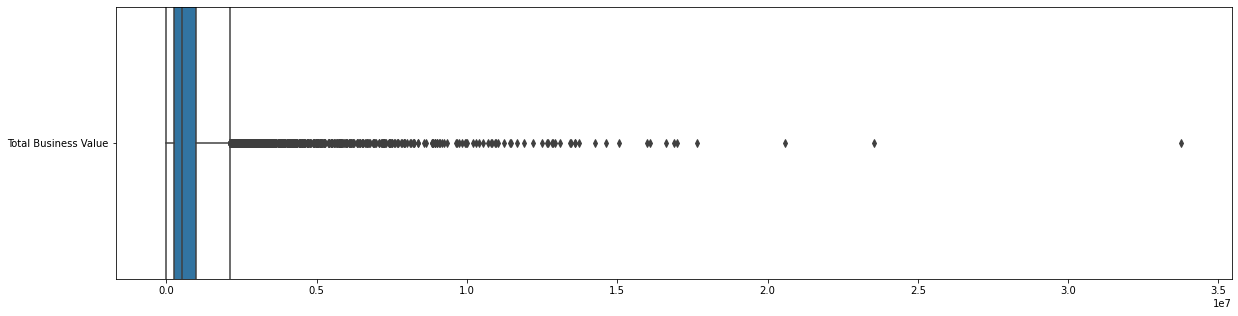

In [164]:
data1 = hr_att_train_app_2[['Total Business Value']][hr_att_train_app_2['Total Business Value']>=100]
plt.rc("figure", figsize=(20, 5))
ax = sns.boxplot(data=data1, orient="h",width=30)

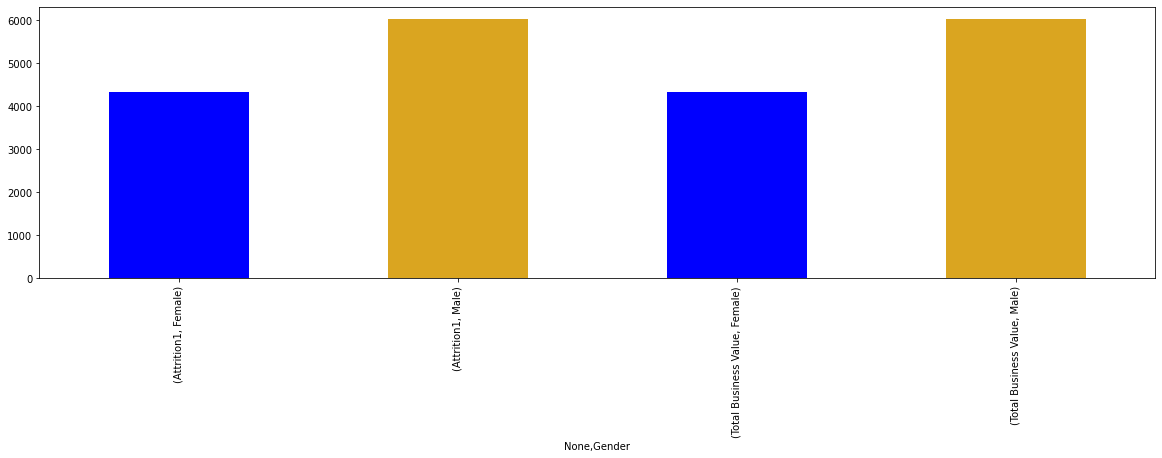

In [165]:
df1=hr_att_train_app_2[hr_att_train_app_2['Attrition1']==1]
df2=df1[['Gender','Attrition1','Total Business Value']].groupby(['Gender']).count().unstack()
df2.plot(kind="bar",color=["blue","goldenrod"])

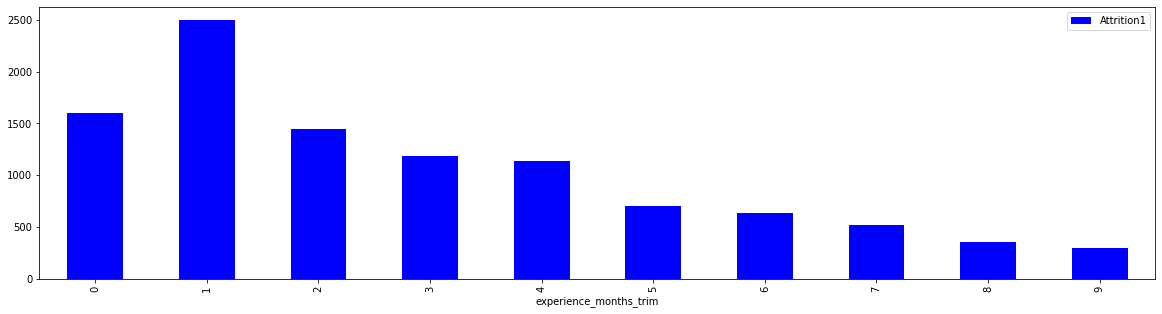

In [166]:
#df1=hr_att_train_new[hr_att_train_new['Attretion']==1]
df2=hr_att_train_app_2[['Attrition1','experience_months_trim']].groupby(['experience_months_trim']).sum()
df2.plot(kind="bar",color=["blue","goldenrod"])

higher experience lesser attrition

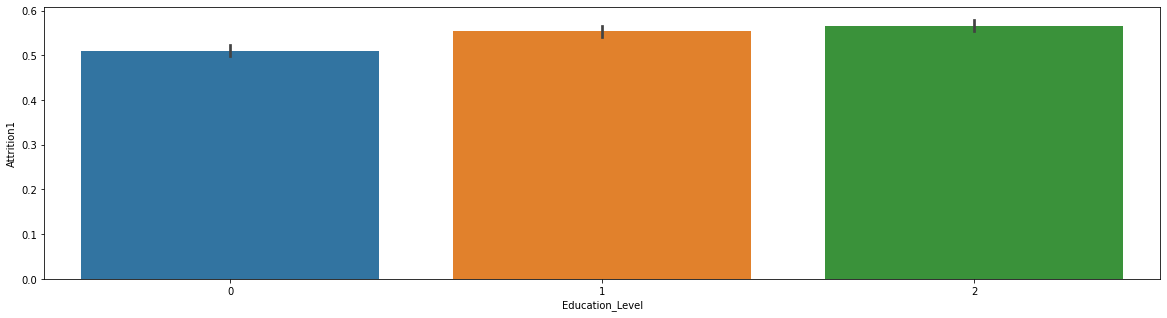

In [167]:
sns.barplot(x = 'Education_Level', y = 'Attrition1', data = hr_att_train_app_2)
#<AxesSubplot:xlabel='Education_Level', ylabel='Attrition'>

no effect in education level vs attrition

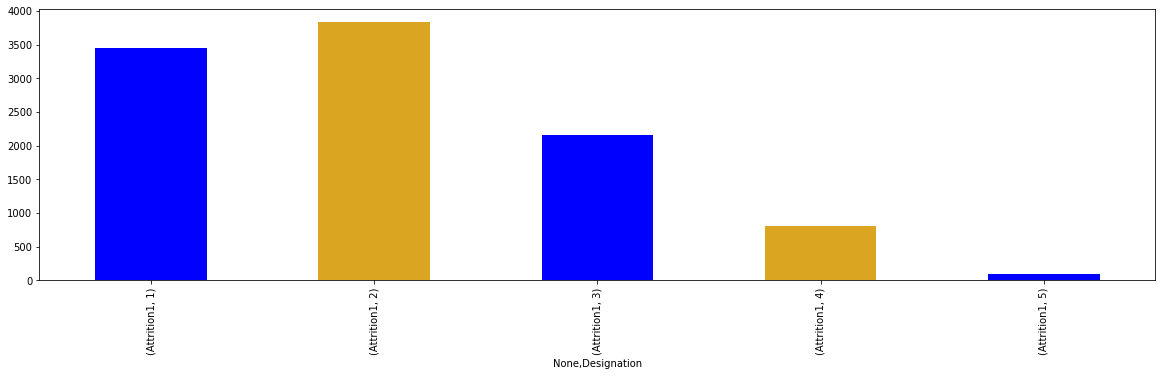

In [168]:
df2=hr_att_train_app_2[['Attrition1','Designation']].groupby(['Designation']).sum().unstack()
df2.plot(kind="bar",color=["blue","goldenrod"])

Here designation plays important role higher designation, lesser attrition

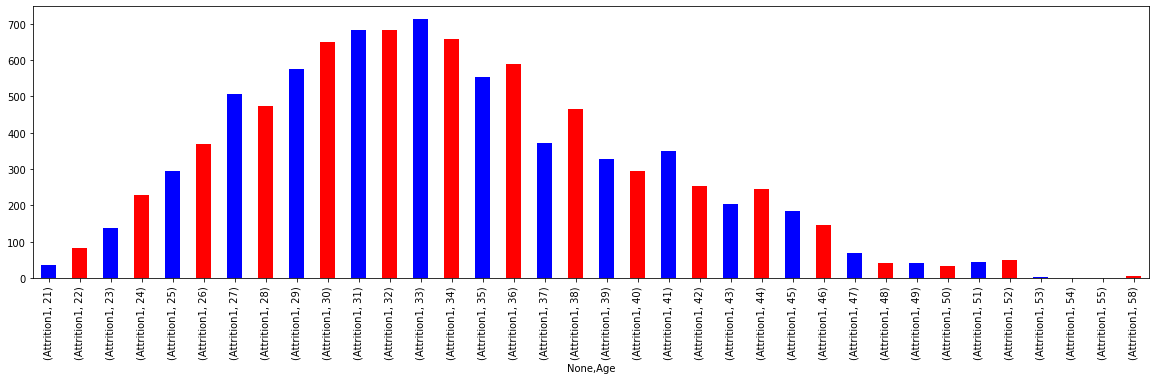

In [169]:
df2=hr_att_train_app_2[['Attrition1','Age']].groupby(['Age']).sum().unstack()
df2.plot(kind="bar",color=["blue","red"])

In [170]:
hr_att_train_app_2['Age'].value_counts()

36    1283
33    1250
34    1234
32    1150
30    1146
35    1138
31    1090
29    1013
37     862
38     854
39     788
28     772
27     752
40     706
41     661
26     583
42     478
25     449
44     407
43     399
45     371
46     350
24     277
47     224
23     193
48     144
49      99
22      92
52      78
51      72
50      69
21      41
53      26
54      25
55      21
58       7
Name: Age, dtype: int64

here age with less than 30 ang greater than 45 count are less compare to 30 to 45 age. so we cant conclude that attrition is based on age

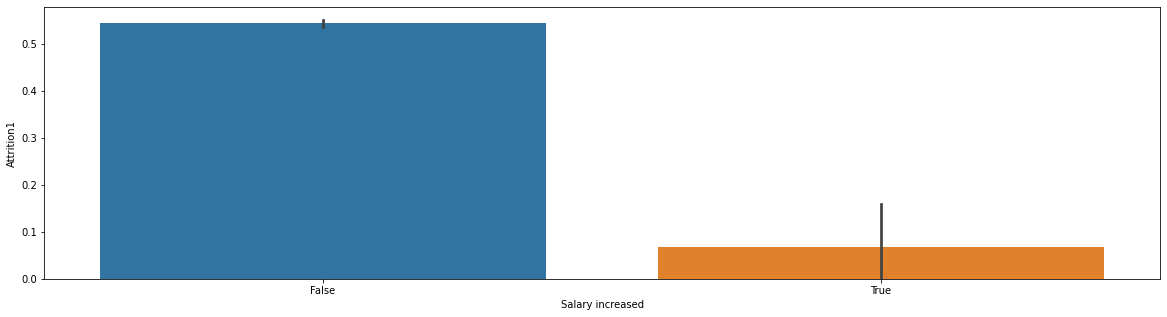

In [171]:
sns.barplot(x = 'Salary increased', y = 'Attrition1', data = hr_att_train_app_2)
#<AxesSubplot:xlabel='Education_Level', ylabel='Attrition'>

here employees who's salary got increased in has less attrition count

In [172]:
hr_att_train_app_2[['Emp_ID','Attrition1','LastWorkingDate','MMM-YY','Total Business Value']].groupby(['Emp_ID','MMM-YY']).sum()

Attrition1  Total Business Value
Emp_ID MMM-YY                                      
1      2016-01-01           1               2381060
       2016-02-01           1               -665480
       2016-03-01           1                     0
2      2017-11-01           0                     0
       2017-12-01           0                     0
...                       ...                   ...
2788   2017-08-01           0                740280
       2017-09-01           0                448370
       2017-10-01           0                     0
       2017-11-01           0                200420
       2017-12-01           0                411480

[19104 rows x 2 columns]

In [117]:
hr_att_train_app_2.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Attrition1',
       'experience_months', 'experience_months_trim', 'Promoted by',
       'Salary increased'],
      dtype='object')

In [173]:
hr_att_train_app_2['Salary increased']= label_encoder.fit_transform(hr_att_train_app_2['Salary increased'])
hr_att_train_app_2['Salary increased'].value_counts()

0    19060
1       44
Name: Salary increased, dtype: int64

In [174]:
hr_att_train_app_2['Salary increased'] = hr_att_train_app_2['Salary increased'].astype('category').cat.codes
hr_att_train_app_2['Education_Level'] = hr_att_train_app_2['Education_Level'].astype('category').cat.codes
#hr_att_train_app_2_final['Gender'] = hr_att_train_app_2_final['Gender'].astype('category').cat.codes

# Lets seperate train, validation and test dataset

2016 dataset as train and validation set, 2017(given emp_id) as test

In [176]:
hr_att_train_app_2 = hr_att_train_app_2.sort_values(['MMM-YY', 'Attrition1'], ascending=[True, False])
hr_att_train_app_2.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition1,experience_months,experience_months_trim,Promoted by,Salary increased
0,2016-01-01,1,28,Male,C23,2,57387,2015-12-24,NaT,1,1,2381060,2,1,0.262839,0,0,0
10,2016-01-01,5,29,Male,C9,1,46368,2016-01-09,NaT,1,1,0,1,1,-0.262839,0,0,0
28,2016-01-01,13,29,Male,C19,2,119227,2012-05-28,NaT,1,4,250000,1,1,43.138463,4,3,0
54,2016-01-01,16,30,Female,C23,1,52963,2015-11-30,NaT,2,2,346800,1,1,1.051356,1,0,0
56,2016-01-01,17,42,Male,C20,2,51099,2015-03-06,NaT,1,1,100000,2,1,9.889320,9,0,0


In [179]:
hr_att_train_app_2.count()

MMM-YY                    19104
Emp_ID                    19104
Age                       19104
Gender                    19104
City                      19104
Education_Level           19104
Salary                    19104
Dateofjoining             19104
LastWorkingDate            1616
Joining Designation       19104
Designation               19104
Total Business Value      19104
Quarterly Rating          19104
Attrition1                19104
experience_months         19104
experience_months_trim    19104
Promoted by               19104
Salary increased          19104
dtype: int64

In [178]:
hr_att_train_app_2_2017 = hr_att_train_app_2[hr_att_train_app_2['MMM-YY'] == '2017-12-01']
test_data = pd.DataFrame({'Emp_ID': hr_att_test.iloc[:, 0]}).merge(hr_att_train_app_2_2017)
test_data = test_data.drop(columns = ['Attrition1'])
train_data = hr_att_train_app_2[hr_att_train_app_2['MMM-YY'] != '2017-12-01'] 
print(test_data.count())
print(train_data.count())

Emp_ID                    741
MMM-YY                    741
Age                       741
Gender                    741
City                      741
Education_Level           741
Salary                    741
Dateofjoining             741
LastWorkingDate             0
Joining Designation       741
Designation               741
Total Business Value      741
Quarterly Rating          741
experience_months         741
experience_months_trim    741
Promoted by               741
Salary increased          741
dtype: int64
MMM-YY                    18285
Emp_ID                    18285
Age                       18285
Gender                    18285
City                      18285
Education_Level           18285
Salary                    18285
Dateofjoining             18285
LastWorkingDate            1538
Joining Designation       18285
Designation               18285
Total Business Value      18285
Quarterly Rating          18285
Attrition1                18285
experience_months         182

## Lets remove unwanted columns

In [180]:
test_data_final=test_data.drop(columns=['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'experience_months','Salary'])

In [181]:
train_data_final=train_data.drop(columns=['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'experience_months','Salary'])

In [205]:
test_data_final.columns

Index(['Education_Level', 'Total Business Value', 'Quarterly Rating',
       'experience_months_trim', 'Promoted by', 'Salary increased'],
      dtype='object')

## Train and validation split

In [182]:
X=train_data_final.drop(columns=(['Attrition1']))
y=train_data_final['Attrition1']

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(13713, 6) (4572, 6) (13713,) (4572,)


# Model creation-Logistic reg and Randomforest

In [200]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 

In [185]:
from sklearn.linear_model import LogisticRegression
model_LOGISTICS = LogisticRegression(class_weight='balanced', solver='saga',penalty='l1')
model_LOGISTICSfit = model_LOGISTICS.fit(X_train, y_train)

In [188]:
y_pred_valid = model_LOGISTICSfit.predict(X_valid)
# Measuring Goodness of fit in Training data
#print('R2 Value logistic:',metrics.r2_score(X_Train_scaled_smt, model_LOGISTICSfit.predict(X_Train_scaled_smt)))
print(confusion_matrix(y_valid, y_pred_valid))
print(classification_report(y_valid, y_pred_valid))

[[1586  366]
 [1402 1218]]
              precision    recall  f1-score   support

           0       0.53      0.81      0.64      1952
           1       0.77      0.46      0.58      2620

    accuracy                           0.61      4572
   macro avg       0.65      0.64      0.61      4572
weighted avg       0.67      0.61      0.61      4572



In [190]:
X.columns

Index(['Education_Level', 'Total Business Value', 'Quarterly Rating',
       'experience_months_trim', 'Promoted by', 'Salary increased'],
      dtype='object')

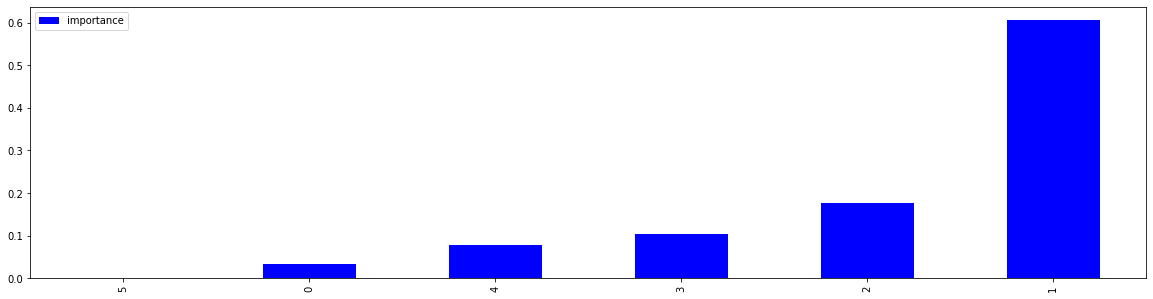

In [189]:
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
model_Randomforest_smt.fit(X,y)
importance=model_Randomforest_smt.feature_importances_
df=pd.DataFrame({'features':pd.DataFrame(X).columns,'importance':importance})
df.set_index('importance')
df=df.sort_values('importance')
#importance.k_feature_names_
df.plot.bar(color='blue')

In [197]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
model_Randomforest_smt= RandomForestClassifier(n_estimators= 100, criterion="gini", class_weight='balanced')  
#Rscaler = RobustScaler()

pipeline_RFsmt = make_pipeline(model_Randomforest_smt)

#model_Randomforest_smt = model_Randomforest_smt.fit(X_Train_scaled_smt, y_train_smt)
#y_pred_test_RF = model_Randomforest_smt.predict(X_Test_scaled)
#print('R2 Value RANDOM FOREST:',metrics.r2_score(X_Train_scaled_smt, model_Randomforest_smt.predict(X_Train_scaled_smt)))
kf = StratifiedKFold(n_splits=5)
y_pred_RF = cross_val_predict(pipeline_RFsmt,X, y, cv=kf)
print(confusion_matrix(y, y_pred_RF))
print(classification_report(y, y_pred_RF))

[[4533 3471]
 [2697 7584]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      8004
           1       0.69      0.74      0.71     10281

    accuracy                           0.66     18285
   macro avg       0.66      0.65      0.65     18285
weighted avg       0.66      0.66      0.66     18285



In [203]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 100)
clf.fit(X_train, y_train)
#AdaBoostClassifier(random_state=1)

y_pred_ada = clf.predict(X_valid)
print(confusion_matrix(y_pred_ada, y_valid))

print(f1_score(y_pred_ada, y_valid))
print(classification_report(y_pred_ada, y_valid))

[[1231  597]
 [ 721 2023]]
0.7542878448918717
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1828
           1       0.77      0.74      0.75      2744

    accuracy                           0.71      4572
   macro avg       0.70      0.71      0.70      4572
weighted avg       0.72      0.71      0.71      4572



# lets predict test_data with Adaboost

In [206]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 100)
clf.fit(X_train, y_train)
#AdaBoostClassifier(random_state=1)

y_pred_test_ada = clf.predict(test_data_final)


In [210]:
test_data['Emp_ID'].head()

0     394
1     173
2    1090
3     840
4     308
Name: Emp_ID, dtype: int64

In [208]:
hr_att_test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [212]:
hr_att_test['Attrition_target']=y_pred_test_ada
hr_att_test

,Emp_ID,Attrition_target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,1
737,2255,0
738,448,0
739,1644,1


In [120]:
#hr_att_train['Quarter'] = hr_att_train.iloc[:,0].dt.to_period('Q')
# extract the target feature
#attrition_status = hr_att_train.groupby(['Emp_ID', 'Quarter'])['LastWorkingDate'].last().agg(lambda x: int(pd.notna(x)))

In [121]:
#print(hr_att_train['MMM-YY'].dt.month.value_counts())
#print(hr_att_train['MMM-YY'].dt.year.value_counts())